# Máster en Python Avanzado por Asociación AEPI

## Módulo XI - Programación Científica

### Enunciado del problema

En esta competición vuestra tarea es la de predecir cuando un pasajero ha sido transportado a otra dimensión, durante el impacto de la nave espacial Titanic con una anomalía del espacio tiempo.

Para ayudaros con la predicción, tienes acceso a los registros de personas recuperados del ordenador de abordo.

### Descripción conjunto de datos

* PassengerId - Un identificador único por cada pasajero. Tiene la forma gggg_pp donde gggg indica el grupo con el que está viajando y pp su número dentro del grupo. Los miembros de un grupo suelen ser familiares, pero no siempre.
* HomePlanet - El planeta donde embarcó el pasajero.
* CryoSleep - Indica si el pasajero eligió pausar sus constantes vitales durante el viaje. En este caso viajaba confinado en su cabina.
* Cabin - El número de la cabina. Tiene la forma Puente/Número/Lado.
* Destination - El planeta de desembarque.
* Age - La edad del pasajero.
* VIP - Si el pasajero ha pagado por servicios VIP dentro del viaje.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Cantidad de dinero que ha gastado en las facilidades de la nave espacial.
* Name - Nombre y apellido del pasajero.
* Transported - Si finalmente, el pasajero fue trasportado a otra dimensión. Este es el valor que tenemos que predecir.



### Conseguir herramientas

In [1]:
#%pip install matplotlib seaborn pandas numpy scikit-learn

### Selección de herramientas

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


### Tuning de herramientas

In [3]:
np.random.seed(10)

### Acceso a objetos de experimentación

In [4]:
train_df = pd.read_csv("train.csv")

### Técnicas de exploración

In [5]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_df.shape

(8693, 14)

In [8]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [10]:
train_df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [11]:
train_df.Destination.describe()


count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

In [12]:
train_df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

### Transformaciones

In [13]:
mapper = {"TRAPPIST-1e": 0, "PSO J318.5-22": 1, "55 Cancri e":2}

train_df.Destination = train_df.Destination.map(mapper)

### Limpieza de datos

In [14]:
substitutions = np.random.randint(0, 3, size=train_df.Destination.isnull().sum())
train_df.Destination[np.isnan(train_df.Destination)] = substitutions

C:\Users\ManuBenito\AppData\Local\Temp\ipykernel_11608\528944549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.Destination[np.isnan(train_df.Destination)] = substitutions


In [15]:
train_df.Destination = train_df.Destination.astype(int)

In [16]:
train_df.info()# rellenar los NaN values de la columna HomePlanet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int32(1), object(6)
memory usage: 857.5+ KB


In [17]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [19]:
train_df['HomePlanet'].fillna('Neptune', inplace=True)

In [20]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', 'Neptune'], dtype=object)

In [21]:
train_df.HomePlanet = train_df.HomePlanet.map({"Europa":0, "Earth": 1, "Mars": 2, "Neptune": 3})


In [22]:
train_df.HomePlanet.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: HomePlanet
Non-Null Count  Dtype
--------------  -----
8693 non-null   int64
dtypes: int64(1)
memory usage: 68.0 KB


### Exploración de datos

In [23]:
train_df.groupby("CryoSleep")[["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]].mean()

,Spa,VRDeck,FoodCourt,ShoppingMall,RoomService
CryoSleep,,,,,
False,486.09294,475.716165,713.004316,270.586504,350.146772
True,0.00000,0.000000,0.000000,0.000000,0.000000


In [24]:
for column in ["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]:
    train_df[column].fillna(train_df[train_df["CryoSleep"]==False][column].mean(), inplace=True)
    train_df[column] = train_df[column].astype(int)




In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(1), int32(6), int64(1), object(5)
memory usage: 687.8+ KB


In [26]:
train_df.groupby("CryoSleep")[["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]].mean()

,Spa,VRDeck,FoodCourt,ShoppingMall,RoomService
CryoSleep,,,,,
False,486.091009,475.700496,713.004229,270.575290,350.143776
True,10.401712,9.697069,16.433981,8.534738,7.836681


In [27]:
train_df.Spa.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Spa
Non-Null Count  Dtype
--------------  -----
8693 non-null   int32
dtypes: int32(1)
memory usage: 34.1 KB


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(1), int32(6), int64(1), object(5)
memory usage: 687.8+ KB


In [29]:
train_df.CryoSleep.fillna(pd.Series(np.where(train_df[["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]].eq(0).all(1, skipna=True), True, False)), inplace=True)


In [30]:
train_df.CryoSleep.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: CryoSleep
Non-Null Count  Dtype
--------------  -----
8693 non-null   bool 
dtypes: bool(1)
memory usage: 8.6 KB


In [31]:
train_df.groupby("CryoSleep")[["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]].mean()

,Spa,VRDeck,FoodCourt,ShoppingMall,RoomService
CryoSleep,,,,,
False,485.749506,476.322500,714.456096,270.126055,350.528102
True,10.112036,9.427017,15.976312,8.297055,7.618438


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(1), int32(6), int64(1), object(4)
memory usage: 628.3+ KB


In [33]:
train_df.Age.fillna(train_df.Age.mean(), inplace=True)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(1), int32(6), int64(1), object(4)
memory usage: 628.3+ KB


In [35]:
#revisar luego para mejorar margen de error
train_df.VIP.fillna(False, inplace=True)


### Aumentar nuestros datos

In [36]:
train_df["Deck"] = train_df.Cabin.str.split("/").str[0]
train_df["Room"] = train_df.Cabin.str.split("/").str[1]
train_df["Side"] = train_df.Cabin.str.split("/").str[2]

In [37]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Side
0,0001_01,0,False,B/0/P,0,39.0,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
1,0002_01,1,False,F/0/S,0,24.0,False,109,9,25,549,44,Juanna Vines,True,F,0,S
2,0003_01,0,False,A/0/S,0,58.0,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
3,0003_02,0,False,A/0/S,0,33.0,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
4,0004_01,1,False,F/1/S,0,16.0,False,303,70,151,565,2,Willy Santantines,True,F,1,S


In [38]:
train_df.Deck.fillna("T", inplace=True)

In [39]:
train_df.Deck.unique()

array(['B', 'F', 'A', 'G', 'T', 'E', 'D', 'C'], dtype=object)

In [40]:
train_df.Deck = train_df.Deck.map({'B':'2', 'F':'6', 'A':'1', 'G':'7', 'E':'5', 'D':'4', 'C':'3', 'T':'8'})
train_df.Deck = train_df.Deck.astype(int)

In [41]:
pop_deck = train_df.groupby('Deck')['PassengerId'].count().rename('population_deck')

In [42]:
pop_transported = pd.pivot(train_df.groupby(['Deck','Transported'])['PassengerId'].count().reset_index(),columns='Transported',index='Deck',values='PassengerId').reset_index().rename(columns = {False:'not_transported_population',True:'transported_population'})

In [43]:
pop_transported

Transported,Deck,not_transported_population,transported_population
0,1,129,127
1,2,207,572
2,3,239,508
3,4,271,207
4,5,563,313
5,6,1565,1229
6,7,1238,1321
7,8,103,101


In [44]:
train_df = pd.merge(train_df,pop_deck,left_on = 'Deck',right_index=True)
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Side,population_deck
0,0001_01,0,False,B/0/P,0,39.0,False,0,0,0,0,0,Maham Ofracculy,False,2,0,P,779
9,0008_01,0,True,B/1/P,2,14.0,False,0,0,0,0,0,Erraiam Flatic,True,2,1,P,779
10,0008_02,0,True,B/1/P,0,34.0,False,0,0,270,0,0,Altardr Flatic,True,2,1,P,779
11,0008_03,0,False,B/1/P,2,45.0,False,39,7295,589,110,124,Wezena Flatic,True,2,1,P,779
42,0043_01,0,False,B/3/P,0,45.0,False,0,164,45,2511,855,Ankalik Cylistrand,False,2,3,P,779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,9197_02,0,False,C/308/P,1,41.0,True,0,7964,0,3238,5839,Aludram Platch,False,3,308,P,747
8622,9197_03,0,False,C/308/P,0,31.0,False,0,4634,8,616,0,Pheino Platch,True,3,308,P,747
8623,9197_04,0,False,C/308/P,2,30.0,False,1569,713,0,486,2252,Phecca Platch,False,3,308,P,747
8626,9202_01,0,False,C/309/P,0,26.0,False,8586,77,114,29,4,Alark Eguing,False,3,309,P,747


In [45]:
train_df = pd.merge(train_df,pop_transported,left_on = 'Deck',right_on='Deck')
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Side,population_deck,not_transported_population,transported_population
0,0001_01,0,False,B/0/P,0,39.0,False,0,0,0,0,0,Maham Ofracculy,False,2,0,P,779,207,572
1,0008_01,0,True,B/1/P,2,14.0,False,0,0,0,0,0,Erraiam Flatic,True,2,1,P,779,207,572
2,0008_02,0,True,B/1/P,0,34.0,False,0,0,270,0,0,Altardr Flatic,True,2,1,P,779,207,572
3,0008_03,0,False,B/1/P,2,45.0,False,39,7295,589,110,124,Wezena Flatic,True,2,1,P,779,207,572
4,0043_01,0,False,B/3/P,0,45.0,False,0,164,45,2511,855,Ankalik Cylistrand,False,2,3,P,779,207,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9197_02,0,False,C/308/P,1,41.0,True,0,7964,0,3238,5839,Aludram Platch,False,3,308,P,747,239,508
8689,9197_03,0,False,C/308/P,0,31.0,False,0,4634,8,616,0,Pheino Platch,True,3,308,P,747,239,508
8690,9197_04,0,False,C/308/P,2,30.0,False,1569,713,0,486,2252,Phecca Platch,False,3,308,P,747,239,508
8691,9202_01,0,False,C/309/P,0,26.0,False,8586,77,114,29,4,Alark Eguing,False,3,309,P,747,239,508


In [46]:
train_df['transported_density'] = round(train_df['transported_population']/train_df['population_deck'],3)
train_df['not_transported_density'] = round(train_df['not_transported_population']/train_df['population_deck'],3)

In [47]:
train_df.sort_values('not_transported_density')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Deck,Room,Side,population_deck,not_transported_population,transported_population,transported_density,not_transported_density
0,0001_01,0,False,B/0/P,0,39.00000,False,0,0,0,...,Maham Ofracculy,False,2,0,P,779,207,572,0.734,0.266
514,5927_06,0,False,B/201/P,2,35.00000,False,4,3857,324,...,Grastab Sysilstict,False,2,201,P,779,207,572,0.734,0.266
515,5927_07,0,False,B/201/P,2,43.00000,False,0,1706,0,...,Jihoton Ballexy,False,2,201,P,779,207,572,0.734,0.266
516,5930_01,0,True,B/227/S,2,24.00000,False,0,0,0,...,Muonea Geakerat,True,2,227,S,779,207,572,0.734,0.266
517,5930_02,0,False,B/227/S,0,28.00000,False,0,1014,0,...,Yildus Geakerat,False,2,227,S,779,207,572,0.734,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,6157_01,2,False,E/407/S,0,49.00000,False,460,86,92,...,Weros Bost,False,5,407,S,876,563,313,0.357,0.643
7170,6138_01,2,False,E/406/S,0,28.82793,False,236,699,332,...,Mos Frie,True,5,406,S,876,563,313,0.357,0.643
7169,6127_01,0,False,E/404/S,0,27.00000,False,551,1436,0,...,Axionif Crueld,False,5,404,S,876,563,313,0.357,0.643
7180,6230_01,2,False,E/414/S,0,33.00000,False,559,0,145,...,Hal Facke,False,5,414,S,876,563,313,0.357,0.643


In [48]:
#train_df.Deck = train_df.Deck.map({value: idx for idx, value in enumerate(train_df.Deck.unique())})

In [49]:
#train_df.Deck.unique()

In [50]:
train_df.Room.unique()

array(['0', '1', '3', ..., '436', '495', '590'], dtype=object)

In [51]:
train_df.Room.fillna("947", inplace=True)

In [52]:
train_df.Room = train_df.Room.astype(np.int)

C:\Users\ManuBenito\AppData\Local\Temp\ipykernel_11608\456286870.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_df.Room = train_df.Room.astype(np.int)


In [53]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Deck,Room,Side,population_deck,not_transported_population,transported_population,transported_density,not_transported_density
0,0001_01,0,False,B/0/P,0,39.0,False,0,0,0,...,Maham Ofracculy,False,2,0,P,779,207,572,0.734,0.266
1,0008_01,0,True,B/1/P,2,14.0,False,0,0,0,...,Erraiam Flatic,True,2,1,P,779,207,572,0.734,0.266
2,0008_02,0,True,B/1/P,0,34.0,False,0,0,270,...,Altardr Flatic,True,2,1,P,779,207,572,0.734,0.266
3,0008_03,0,False,B/1/P,2,45.0,False,39,7295,589,...,Wezena Flatic,True,2,1,P,779,207,572,0.734,0.266
4,0043_01,0,False,B/3/P,0,45.0,False,0,164,45,...,Ankalik Cylistrand,False,2,3,P,779,207,572,0.734,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9197_02,0,False,C/308/P,1,41.0,True,0,7964,0,...,Aludram Platch,False,3,308,P,747,239,508,0.680,0.320
8689,9197_03,0,False,C/308/P,0,31.0,False,0,4634,8,...,Pheino Platch,True,3,308,P,747,239,508,0.680,0.320
8690,9197_04,0,False,C/308/P,2,30.0,False,1569,713,0,...,Phecca Platch,False,3,308,P,747,239,508,0.680,0.320
8691,9202_01,0,False,C/309/P,0,26.0,False,8586,77,114,...,Alark Eguing,False,3,309,P,747,239,508,0.680,0.320


In [54]:
train_df.Side.fillna("S", inplace=True)

In [55]:
train_df.Side = train_df.Side.map({value: idx for idx, value in enumerate(train_df.Side.unique())})

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PassengerId                 8693 non-null   object 
 1   HomePlanet                  8693 non-null   int64  
 2   CryoSleep                   8693 non-null   bool   
 3   Cabin                       8494 non-null   object 
 4   Destination                 8693 non-null   int32  
 5   Age                         8693 non-null   float64
 6   VIP                         8693 non-null   bool   
 7   RoomService                 8693 non-null   int32  
 8   FoodCourt                   8693 non-null   int32  
 9   ShoppingMall                8693 non-null   int32  
 10  Spa                         8693 non-null   int32  
 11  VRDeck                      8693 non-null   int32  
 12  Name                        8493 non-null   object 
 13  Transported                 8693 

In [57]:
train_df = train_df.drop(["Cabin"], axis=1)

In [58]:
train_df = train_df.drop(["Name"], axis=1)

In [59]:
train_df.describe()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Room,Side,population_deck,not_transported_population,transported_population,transported_density,not_transported_density
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,1.003451,0.525825,28.827930,227.296791,463.443690,176.032670,314.819855,308.534453,5.367077,608.302772,0.516162,1912.202807,984.378235,927.824571,0.503533,0.496467
std,0.734864,0.822168,14.339054,659.981984,1594.854944,597.598591,1124.956005,1133.529303,1.803371,508.623033,0.499767,987.664709,561.137078,450.296795,0.105928,0.105928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,204.000000,103.000000,101.000000,0.357000,0.266000
25%,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,173.000000,0.000000,779.000000,271.000000,508.000000,0.440000,0.484000
50%,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,448.000000,1.000000,2559.000000,1238.000000,1229.000000,0.495000,0.505000
75%,1.000000,1.000000,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,7.000000,983.000000,1.000000,2794.000000,1565.000000,1321.000000,0.516000,0.560000
max,3.000000,2.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000,1894.000000,1.000000,2794.000000,1565.000000,1321.000000,0.734000,0.643000


In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PassengerId                 8693 non-null   object 
 1   HomePlanet                  8693 non-null   int64  
 2   CryoSleep                   8693 non-null   bool   
 3   Destination                 8693 non-null   int32  
 4   Age                         8693 non-null   float64
 5   VIP                         8693 non-null   bool   
 6   RoomService                 8693 non-null   int32  
 7   FoodCourt                   8693 non-null   int32  
 8   ShoppingMall                8693 non-null   int32  
 9   Spa                         8693 non-null   int32  
 10  VRDeck                      8693 non-null   int32  
 11  Transported                 8693 non-null   bool   
 12  Deck                        8693 non-null   int32  
 13  Room                        8693 

In [61]:
train_df = train_df.drop(["PassengerId"], axis=1)

In [62]:
train_df.Age = train_df.Age.astype(int)

In [63]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Room,Side,population_deck,not_transported_population,transported_population,transported_density,not_transported_density
0,0,False,0,39,False,0,0,0,0,0,False,2,0,0,779,207,572,0.734,0.266
1,0,True,2,14,False,0,0,0,0,0,True,2,1,0,779,207,572,0.734,0.266
2,0,True,0,34,False,0,0,270,0,0,True,2,1,0,779,207,572,0.734,0.266
3,0,False,2,45,False,39,7295,589,110,124,True,2,1,0,779,207,572,0.734,0.266
4,0,False,0,45,False,0,164,45,2511,855,False,2,3,0,779,207,572,0.734,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,False,1,41,True,0,7964,0,3238,5839,False,3,308,0,747,239,508,0.680,0.320
8689,0,False,0,31,False,0,4634,8,616,0,True,3,308,0,747,239,508,0.680,0.320
8690,0,False,2,30,False,1569,713,0,486,2252,False,3,308,0,747,239,508,0.680,0.320
8691,0,False,0,26,False,8586,77,114,29,4,False,3,309,0,747,239,508,0.680,0.320


In [64]:
train_df.groupby(["Deck", "Side", "Transported"]).count().reset_index().sort_values(["Transported", "HomePlanet"], ascending=False)

,Deck,Side,Transported,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Room,population_deck,not_transported_population,transported_population,transported_density,not_transported_density
27,7,1,True,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749
23,6,1,True,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638
21,6,0,True,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591
25,7,0,True,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572
7,2,1,True,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334
11,3,1,True,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310
5,2,0,True,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238
9,3,0,True,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
19,5,1,True,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
17,5,0,True,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147


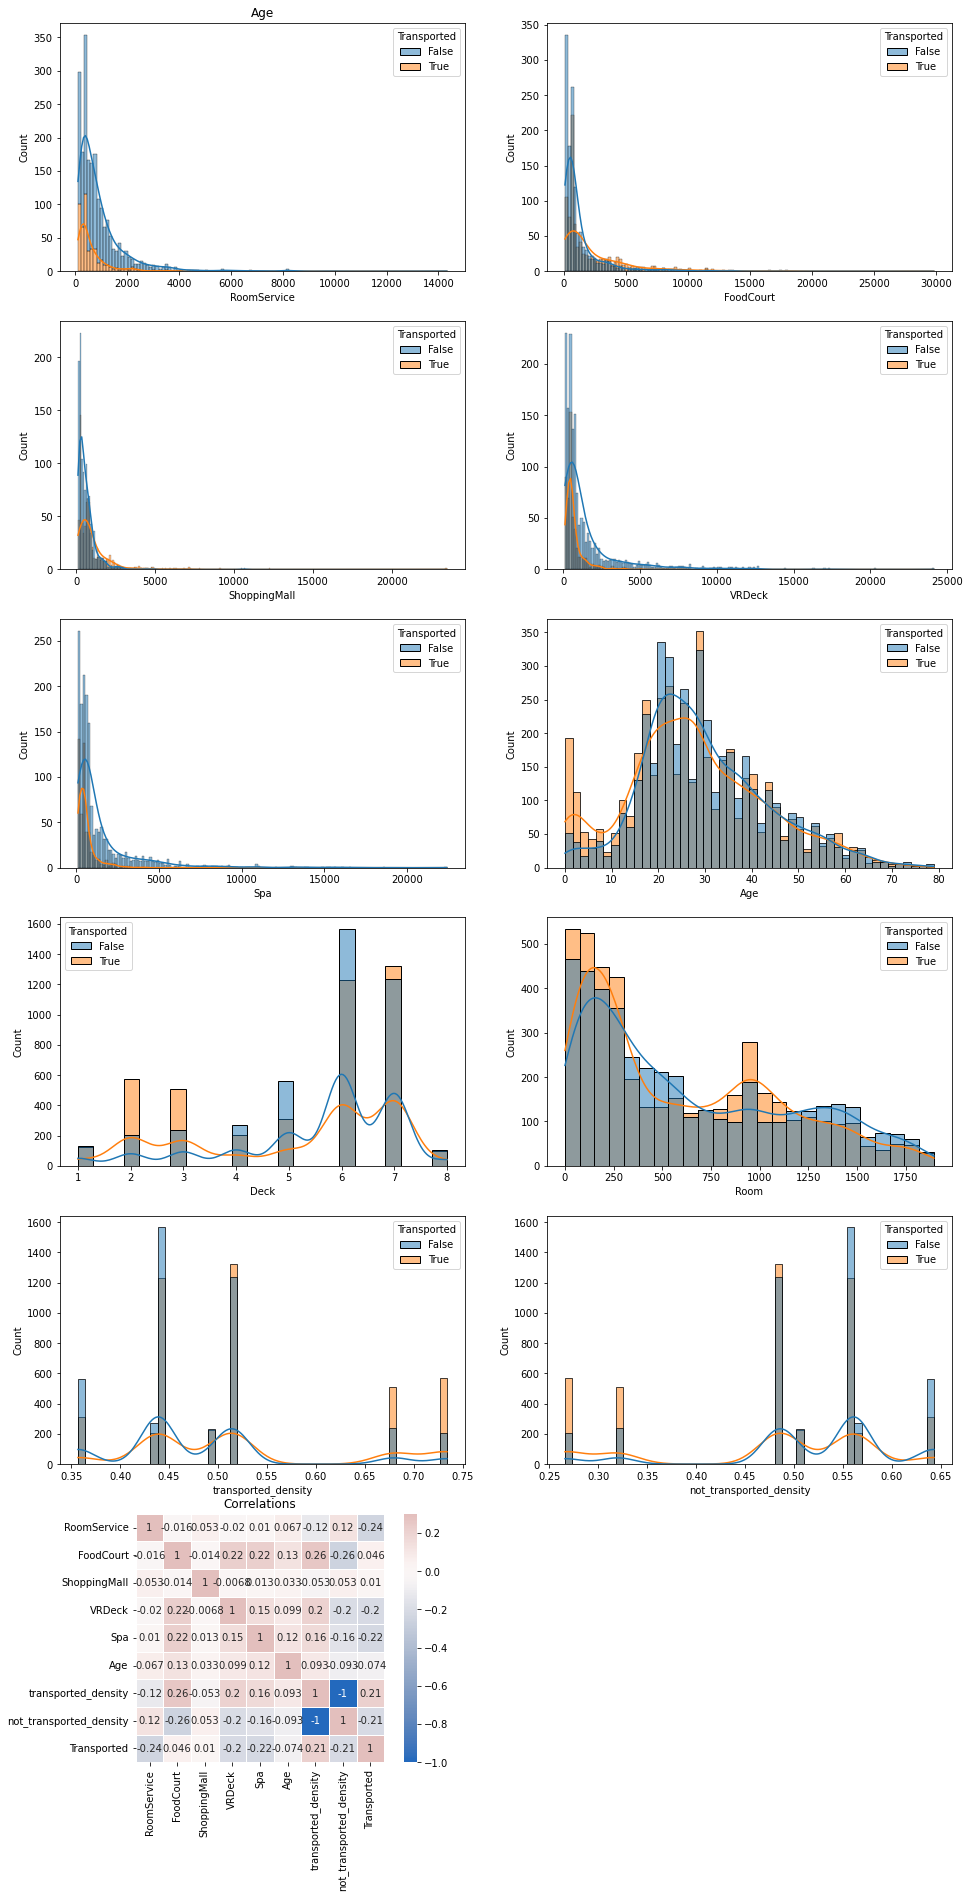

In [69]:
fig, ax = plt.subplots(6, 2, figsize=(16, 32))

cmap = sns.color_palette("vlag", as_cmap=True)
paletteColors = sns.color_palette("vlag", n_colors=6)


sns.histplot(data=train_df[(train_df["RoomService"] > 100)],
             x = "RoomService",
             ax = ax[0,0],
             hue= "Transported",
             multiple="stack",
             kde = True
             )
ax[0,0].set_title("RoomService")
sns.histplot(data=train_df[train_df["FoodCourt"] > 100],
             x = "FoodCourt",
             ax = ax[0,1],
             hue= "Transported",
             kde = True)
ax[0,0].set_title("FoodCourt")
sns.histplot(data=train_df[train_df["ShoppingMall"] > 100],
             x = "ShoppingMall",
             ax = ax[1,0],
             hue= "Transported",
             kde = True)
ax[0,0].set_title("ShoppingMall")
sns.histplot(data=train_df[train_df["VRDeck"] > 100],
             x = "VRDeck",
             ax = ax[1,1],
             hue= "Transported",
             kde = True)
ax[0,0].set_title("VRDeck")
sns.histplot(data=train_df[train_df["Spa"] > 100],
             x = "Spa",
             ax = ax[2,0],
             hue= "Transported",
             kde = True)
ax[0,0].set_title("Spa")
sns.histplot(data=train_df,
             x = "Age",
             ax = ax[2,1],
             hue= "Transported",
             kde = True)
ax[0,0].set_title("Age")

sns.histplot(data=train_df,
             x = "Deck",
             ax = ax[3,0],
             hue= "Transported",
             #multiple="stack"
             kde = True
             )
sns.histplot(data=train_df,
             x = "Room",
             ax = ax[3,1],
             hue= "Transported",
             #multiple="stack"
             kde = True
             )

sns.histplot(data=train_df,
             x = "transported_density",
             ax = ax[4,0],
             hue= "Transported",
             #multiple="stack"
             kde = True
             )

sns.histplot(data=train_df,
             x = "not_transported_density",
             ax = ax[4,1],
             hue= "Transported",
             #multiple="stack",
             kde = True
             )

corr = train_df[["RoomService", "FoodCourt", "ShoppingMall", "VRDeck", "Spa", "Age", 'transported_density','not_transported_density',"Transported"]].corr()
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, annot=True, ax=ax[5,0])

ax[5,0].set_title("Correlations")
ax[5,1].remove()

plt.show()

### Quitar ruido

In [ ]:
train_df = train_df.drop(["FoodCourt", "ShoppingMall"], axis=1)

In [ ]:
Y = train_df["Transported"].copy()
train_df = train_df.drop(["Transported"], axis=1)
x_train, x_test, y_train, y_test  = train_test_split(train_df, Y, test_size=0.3)

### Digestión de datos

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


In [ ]:
rf_predictions = rf.predict(x_test)

In [ ]:
rf_predictions

In [ ]:
gbt = GradientBoostingClassifier()
gbt.fit(x_train, y_train)
gbt_predictions = gbt.predict(x_test)


### Results visualization

In [ ]:
rf_score = accuracy_score(y_test, rf_predictions)
gbt_score = accuracy_score(y_test, gbt_predictions)

print(f"GBT ACCURACY: {gbt_score}")
print(f"RF ACCURACY: {rf_score}")

In [ ]:
for prediction in (gbt_predictions, rf_predictions):
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, color="darkorange", lw="2", label="ROC Curve")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic curve")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_predictions).ravel()

In [ ]:
tn, fp, fn, tp

### Notes

1st iteration: 0.7476993865030674 - Initial setup

2nd iteration: 0.785659509202454 - Arreglar error de normalización

3rd iteration: 0.7726226993865031 - Excluir variables independientes